In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import shap

In [2]:
enb12 = pd.read_csv('ENB2012_data.csv')
enb12.head()
enb12['X1'] = pd.to_numeric(enb12['X1'], errors='coerce')
enb12['X2'] = pd.to_numeric(enb12['X2'], errors='coerce')
enb12['X3'] = pd.to_numeric(enb12['X3'], errors='coerce')
enb12['X4'] = pd.to_numeric(enb12['X4'], errors='coerce')
enb12['X5'] = pd.to_numeric(enb12['X5'], errors='coerce')
enb12['X6'] = pd.to_numeric(enb12['X6'], errors='coerce')
enb12['X7'] = pd.to_numeric(enb12['X7'], errors='coerce')
enb12['X8'] = pd.to_numeric(enb12['X8'], errors='coerce')
enb12['Y1'] = pd.to_numeric(enb12['Y1'], errors='coerce')
enb12['Y2'] = pd.to_numeric(enb12['Y2'], errors='coerce')

enb12 = enb12.dropna()
enb12.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
print (enb12.head())

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0          2.0           0.0                        0.0         15.55   
1          3.0           0.0                        0.0         15.55   
2          4.0           0.0                        0.0         15.55   
3          5.0           0.0                        0.0         15.55   
4          2.0           0.0                        0.0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

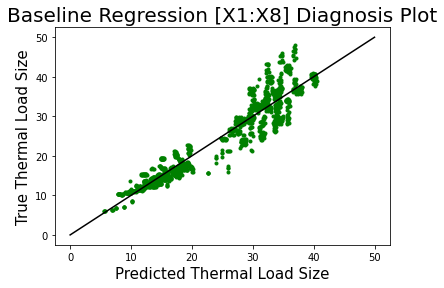

Baseline Regression [X1:X8] MSE:
Heating Load     8.511172
Cooling Load    10.143109
dtype: float64


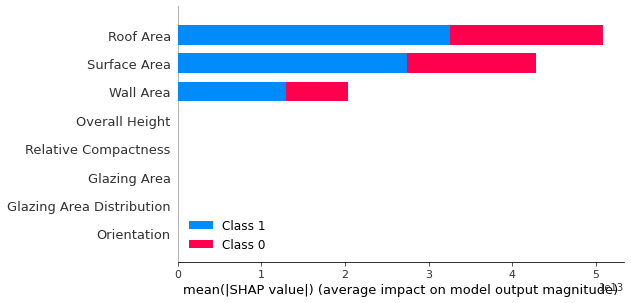

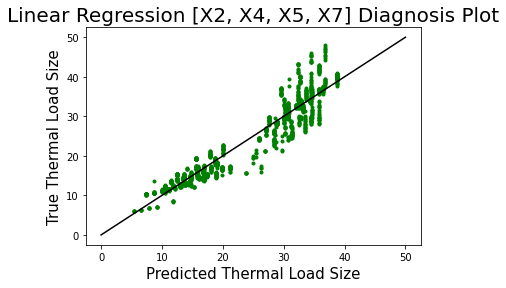

Linear Regression [X2, X4, X5, X7] MSE:
Heating Load     9.060731
Cooling Load    10.693768
dtype: float64


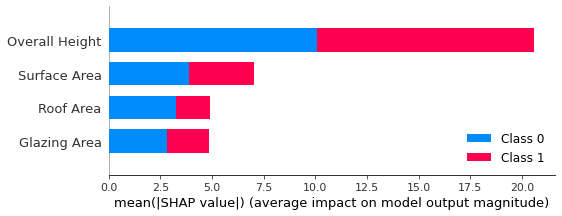

LinearRegression()

In [3]:
def run_energyload_regression(df, X, regression_name):

    Y = enb12[['Heating Load', 'Cooling Load']]
    
    reg = LinearRegression().fit(X, Y)
    reg.coef_, reg.intercept_
    
    y_pred = reg.predict(X)
    
    # Diagnosis plot
    plt.plot(y_pred, Y, '.g')
    plt.plot([0, 50], [0, 50], 'k')
    plt.xlabel('Predicted Thermal Load Size', size = 15)
    plt.ylabel('True Thermal Load Size', size = 15)
    plt.title(regression_name + ' Diagnosis Plot', size = 20)
    plt.show()
    
    # Calculate the absolute errors
    errors = abs(y_pred - Y)
    
    # Calculate mean squared error
    mse = np.mean((Y - y_pred)**2)
    print(regression_name + ' MSE:')
    print(mse)
    
    #Feature Importance
    explainer = shap.LinearExplainer(reg, X)
    shap_values = explainer.shap_values(X[::200])
    shap.summary_plot(shap_values, X[::200])
    
    return reg

X = enb12[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
X_subset = enb12[['Surface Area', 'Roof Area', 'Overall Height', 'Glazing Area']]

run_energyload_regression(enb12, X, 'Baseline Regression [X1:X8]')
run_energyload_regression(enb12, X_subset, 'Linear Regression [X2, X4, X5, X7]')

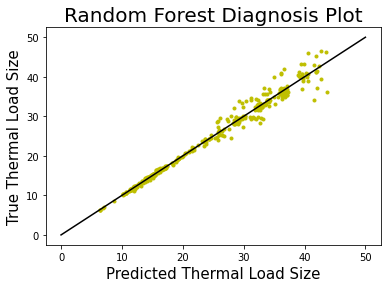

MSE:
Heating Load    0.221265
Cooling Load    3.388308
dtype: float64


In [4]:
y = enb12[[ 'Heating Load', 'Cooling Load']]
X = enb12[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
X_subset = enb12[['Surface Area', 'Roof Area', 'Overall Height', 'Glazing Area']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
errors = abs(predictions - y_test)

# Diagnosis plot
plt.plot(predictions, y_test, '.y')
plt.plot([0, 50], [0, 50], 'k')
plt.xlabel('Predicted Thermal Load Size', size = 15)
plt.ylabel('True Thermal Load Size', size = 15)
plt.title('Random Forest Diagnosis Plot', size = 20)
plt.show()

# Calculate mean squared error
mse = np.mean((y_test - predictions)**2)
print('MSE:')
print(mse)

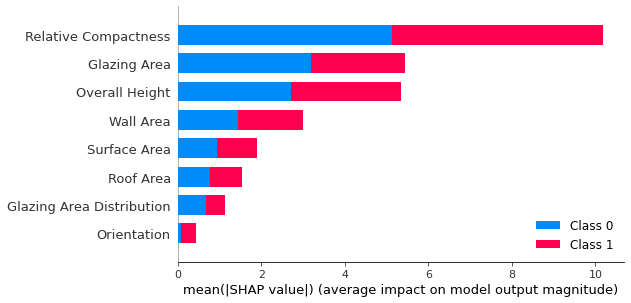

In [5]:
explainer = shap.Explainer(rf, X)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200])